In [1]:
# standard libraries
import importlib
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import linalg, stats, optimize
from copy import deepcopy
import sys
sys.path.append('/Users/francescacrucinio/Documents/MD_LVM')

import md_lvm
importlib.reload(md_lvm)

<module 'md_lvm' from '/Users/francescacrucinio/Documents/MD_LVM/md_lvm.py'>

In [2]:
alpha = 0.7
theta = 1
ndata = 1000

In [3]:
X0 = np.random.randn(ndata, 1).astype('float32')
X = deepcopy(X0)
X[:int(ndata*alpha), 0] += theta
X[int(ndata*alpha):ndata, 0] += -theta

In [4]:
y = X.flatten()

In [5]:
Niter = 100
N = ndata
gamma = 0.05

In [6]:
theta_md, x_md, W_md = md_lvm.md_gmm_fast(y, gamma, Niter, N, -1, 2*np.random.binomial(1, 0.5, N)-1, alpha)

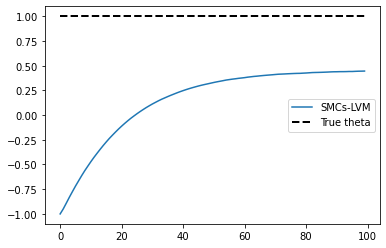

In [7]:
plt.plot(theta_md, label='SMCs-LVM')
plt.plot(theta*np.ones(Niter), label='True theta', c = 'black', linestyle = 'dashed', lw = 2)
plt.legend(loc='right')

In [8]:
np.sum((x_md[Niter-1, :]==1)*W_md)

0.9879993552462737

In [9]:
theta_md[-1]

0.44535155151382266